In [2]:
%cd ..
%matplotlib nbagg

/home/elias/work/mnistconfidnet


In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as T
from sklearn.metrics import accuracy_score

In [19]:
train_val_split = .8

train_valid_dataset = torchvision.datasets.MNIST(
    root=Path("~/datasets/MNIST").expanduser(),
    train=True,
    transform=T.ToTensor(),
    download=True)
nb_train = int(train_val_split * len(train_valid_dataset))
nb_valid = len(train_valid_dataset) - nb_train
train_dataset, valid_dataset = torch.utils.data.dataset.random_split(
    train_valid_dataset, [nb_train, nb_valid])

<IPython.core.display.Javascript object>


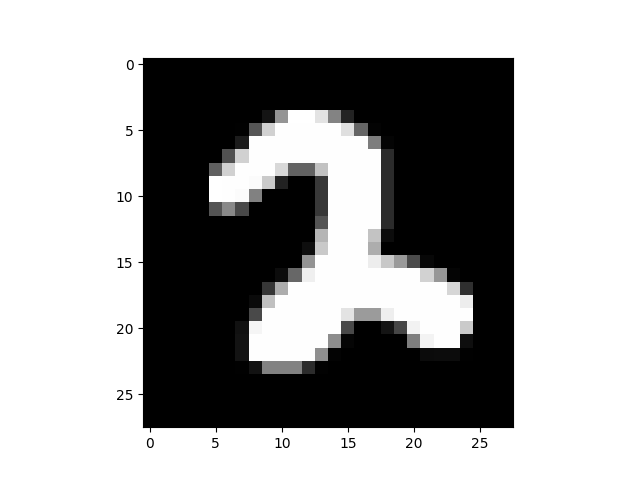

In [23]:
plt.figure()
plt.imshow(train_dataset[10][0][0], cmap="gray")

In [29]:
accuracy_score(torch.zeros(10, 1), torch.zeros(10, 1))

1.0

In [38]:
histograms = {}
histograms["mcp_successes"] = torch.rand(128)
histograms["mcp_errors"] = torch.rand(128, 1)
histograms["tcp_successes"] = torch.rand(128, 1)
histograms["tcp_errors"] = torch.rand(128, 1)

<IPython.core.display.Javascript object>


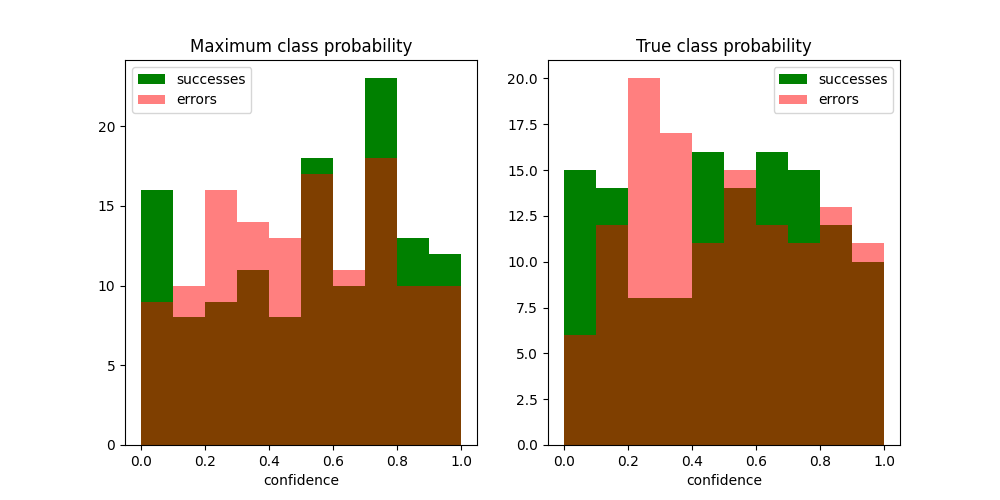

Text(0.5, 1.0, 'True class probability')

In [36]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(histograms["mcp_successes"].numpy(), color='g', bins=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], label="successes")
plt.hist(histograms["mcp_errors"].numpy(), color='r', bins=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], alpha=.5, label="errors")
plt.xlabel("confidence")
plt.title("Maximum class probability")
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(histograms["tcp_successes"].numpy(), color='g', bins=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], label="successes")
plt.hist(histograms["tcp_errors"].numpy(), color='r', bins=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], alpha=.5, label="errors")
plt.legend()
plt.xlabel("confidence")
plt.title("True class probability")